<a href="https://colab.research.google.com/github/vaishnavipatil29/NN_DL_Lab/blob/main/Copy_of_Spring_22_NNDL_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 8 : Autoencoders

Name : Joshitha, Vaishnavi

Roll Number : 180020009, 180020038

Reference : 
 1. https://towardsdatascience.com/how-to-make-an-autoencoder-2f2d99cd5103
 2. https://www.geeksforgeeks.org/contractive-autoencoder-cae/
 3. https://blog.keras.io/building-autoencoders-in-keras.html

#see if all have encoder, encoded and all properly

#Problem 1 :  Demonstrate the working principle of Autoencoder. (pytorch/keras/tensorflow)
Observation to be demonstrated
1. Use suitable data to demonstrate the same. (MNIST fashion/digit data can be
used)
2. Train the auto encoder with clean image and test using noisy image (you can add
some random Gaussian noise). Demonstrate the effect with/without dropout.
3. CNN with output Sigmoid layer and MSE loss can be used. Justify why Sigmoid is fine in this case.
4. Train the network with both clean and noisy version of image where the labeled
image is clean one (that given output to the autoencoder). Demonstrate output
of the autoencoder with noisy image (that is generated separately not used in
training).

##Write down the Objectives, Hypothesis and Experimental description for the above problem


## Programming : 
  Please write a program to demonstrate the same

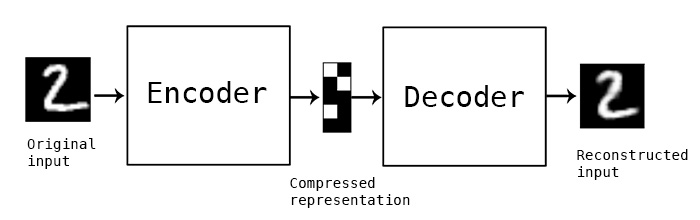

In [ ]:
#------------Imports----------------------#
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np


In [ ]:
#Load the mnist digit Data
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) #28x28 = 784 : Flatten the images
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


print("Train : ", x_train.shape)
print("Test : ", x_test.shape)



Train :  (60000, 784)
Test :  (10000, 784)


In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Part - 1 : First let's try different Autoencoder models on our data

### 1. Single fully-connected neural layer as encoder and as decoder

In [ ]:
import keras
from keras import layers

#---------------------------Latent Size----------------#
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))

#---------------Encoder--------------------#
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
encoder = keras.Model(input_img, encoded)


#----------------Decoder-------------------#
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)
# Retrieve the last layer of the autoencoder model
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
decoder_layer = autoencoder.layers[-1]


#-----------------Give Input-----------#
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/50
235/235 [==============================] - 3s 8ms/step - loss: 0.2792 - val_loss: 0.1922
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1723 - val_loss: 0.1548
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1453 - val_loss: 0.1347
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1295 - val_loss: 0.1220
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1188 - val_loss: 0.1133
Epoch 6/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1113 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1060 - val_loss: 0.1025
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1021 - val_loss: 0.0992
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0993 - val_loss: 0.0967
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0973 - val_loss: 0.0952

Testing

In [ ]:
encoded_img = encoder.predict(np.array(x_test[0]).reshape(1,784))
decoded_img = decoder.predict(encoded_img)
encoded_img.shape

(1, 32)

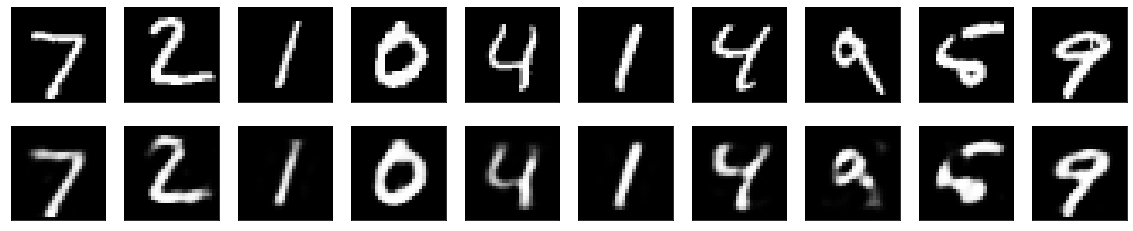

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
autoencoder.save('/content/drive/MyDrive/autoencoder_1')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/autoencoder_1/assets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
encoded_imgs.mean()

8.622282

In [ ]:
from sklearn.manifold import TSNE

# Select 1000 samples from data
X_test_sampled = x_test[:1000, :]
y_test_sampled = y_test[:1000]

# Visualizing the Latent representation
x_compressed = encoder.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(x_compressed)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


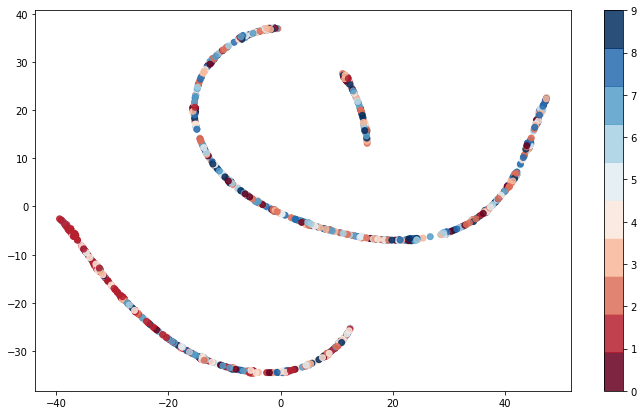

In [ ]:
# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))

##Deep Autoencoders

Without Dropouts

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2485 - val_loss: 0.1695
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1535 - val_loss: 0.1407
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1361 - val_loss: 0.1301
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1271 - val_loss: 0.1224
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1216 - val_loss: 0.1176
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1164 - val_loss: 0.1124
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1115 - val_loss: 0.1080
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1079 - val_loss: 0.1054
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1054 - val_loss: 0.1035
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1035 - val_lo

In [ ]:
autoencoder.save('/content/drive/MyDrive/autoencoder_3')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/autoencoder_3/assets


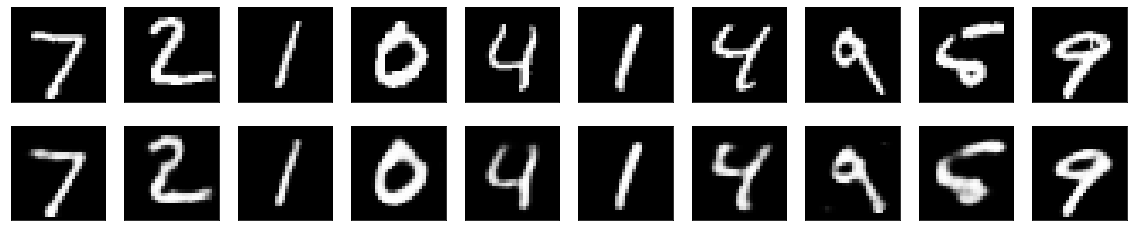

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


With dropouts

In [ ]:
from keras import layers
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dropout(0.5)(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dropout(0.5)(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dropout(0.5)(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dropout(0.5)(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2969 - val_loss: 0.2386
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2359 - val_loss: 0.2110
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2208 - val_loss: 0.2005
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2147 - val_loss: 0.1949
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2109 - val_loss: 0.1919
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2081 - val_loss: 0.1893
Epoch 7/100
235/235 [==============================] - 2s 6ms/step - loss: 0.2056 - val_loss: 0.1860
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2037 - val_loss: 0.1839
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2021 - val_loss: 0.1826
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.2008 - val_lo

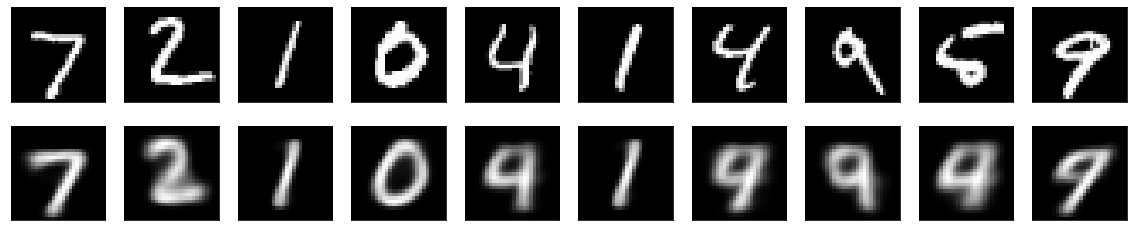

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
autoencoder.save('/content/drive/MyDrive/autoencoder_3_dropouts')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/autoencoder_3_dropouts/assets


## 4. CNN AE

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50, #More 50 epochs
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
469/469 [==============================] - 7s 14ms/step - loss: 0.0891 - val_loss: 0.0879
Epoch 2/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0890 - val_loss: 0.0880
Epoch 3/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0890 - val_loss: 0.0886
Epoch 4/50
469/469 [==============================] - 5s 12ms/step - loss: 0.0889 - val_loss: 0.0879
Epoch 5/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0889 - val_loss: 0.0879
Epoch 6/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0889 - val_loss: 0.0880
Epoch 7/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0889 - val_loss: 0.0878
Epoch 8/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0888 - val_loss: 0.0877
Epoch 9/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0888 - val_loss: 0.0886
Epoch 10/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0888 - val_lo

In [ ]:
autoencoder.save('/content/drive/MyDrive/autoencoder_cnn')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/autoencoder_cnn/assets


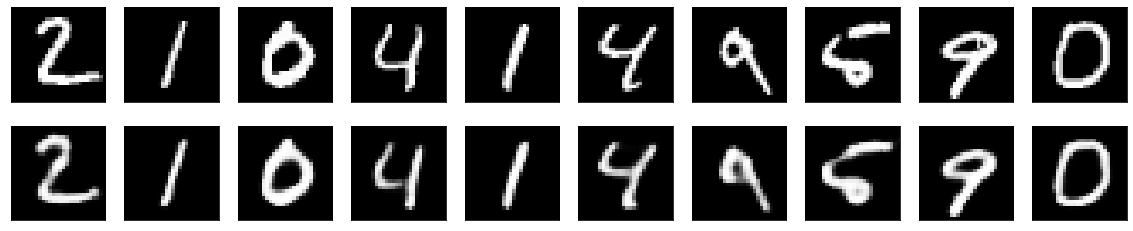

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


With weight decay

In [ ]:
import keras
from keras import layers
from keras.regularizers import l2


input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', bias_regularizer=l2(0.01))(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', bias_regularizer=l2(0.01))(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', bias_regularizer=l2(0.01))(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', bias_regularizer=l2(0.01))(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', bias_regularizer=l2(0.01))(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', bias_regularizer=l2(0.01))(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50, #More 50 epochs
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
469/469 [==============================] - 9s 17ms/step - loss: 0.2146 - val_loss: 0.1506
Epoch 2/50
469/469 [==============================] - 7s 16ms/step - loss: 0.1387 - val_loss: 0.1281
Epoch 3/50
469/469 [==============================] - 7s 14ms/step - loss: 0.1242 - val_loss: 0.1191
Epoch 4/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1176 - val_loss: 0.1147
Epoch 5/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1136 - val_loss: 0.1107
Epoch 6/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1108 - val_loss: 0.1083
Epoch 7/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1085 - val_loss: 0.1063
Epoch 8/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1068 - val_loss: 0.1052
Epoch 9/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1053 - val_loss: 0.1034
Epoch 10/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1041 - val_lo

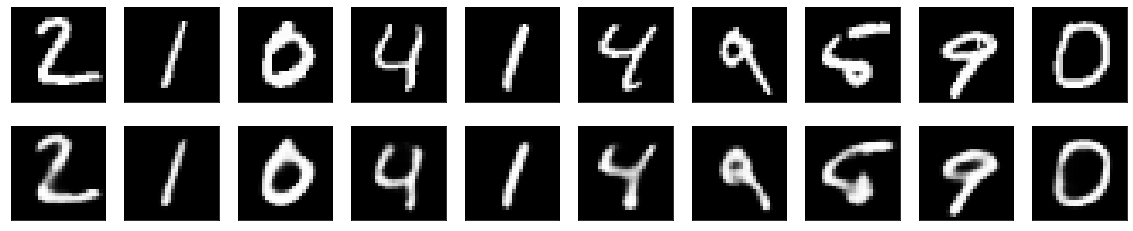

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


With Dropouts

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
469/469 [==============================] - 7s 13ms/step - loss: 0.2438 - val_loss: 0.1679
Epoch 2/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1763 - val_loss: 0.1482
Epoch 3/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1655 - val_loss: 0.1394
Epoch 4/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1594 - val_loss: 0.1343
Epoch 5/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1554 - val_loss: 0.1301
Epoch 6/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1524 - val_loss: 0.1272
Epoch 7/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1496 - val_loss: 0.1257
Epoch 8/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1480 - val_loss: 0.1245
Epoch 9/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1469 - val_loss: 0.1239
Epoch 10/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1459 - val_lo

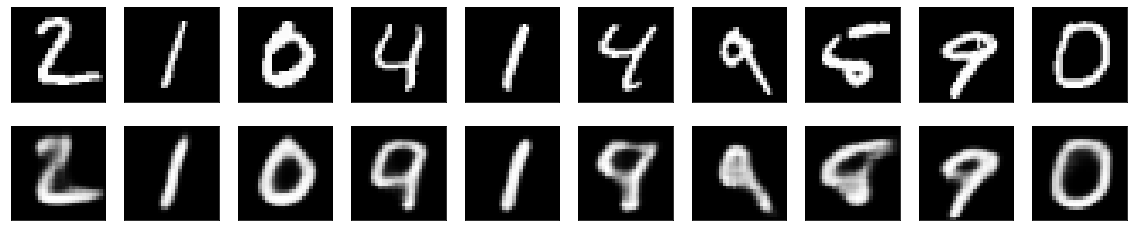

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
encoded_imgs = encoder.predict(x_test)
encoded_imgs.mean() #--------Model 2-----#

1.2676324

## Inferences

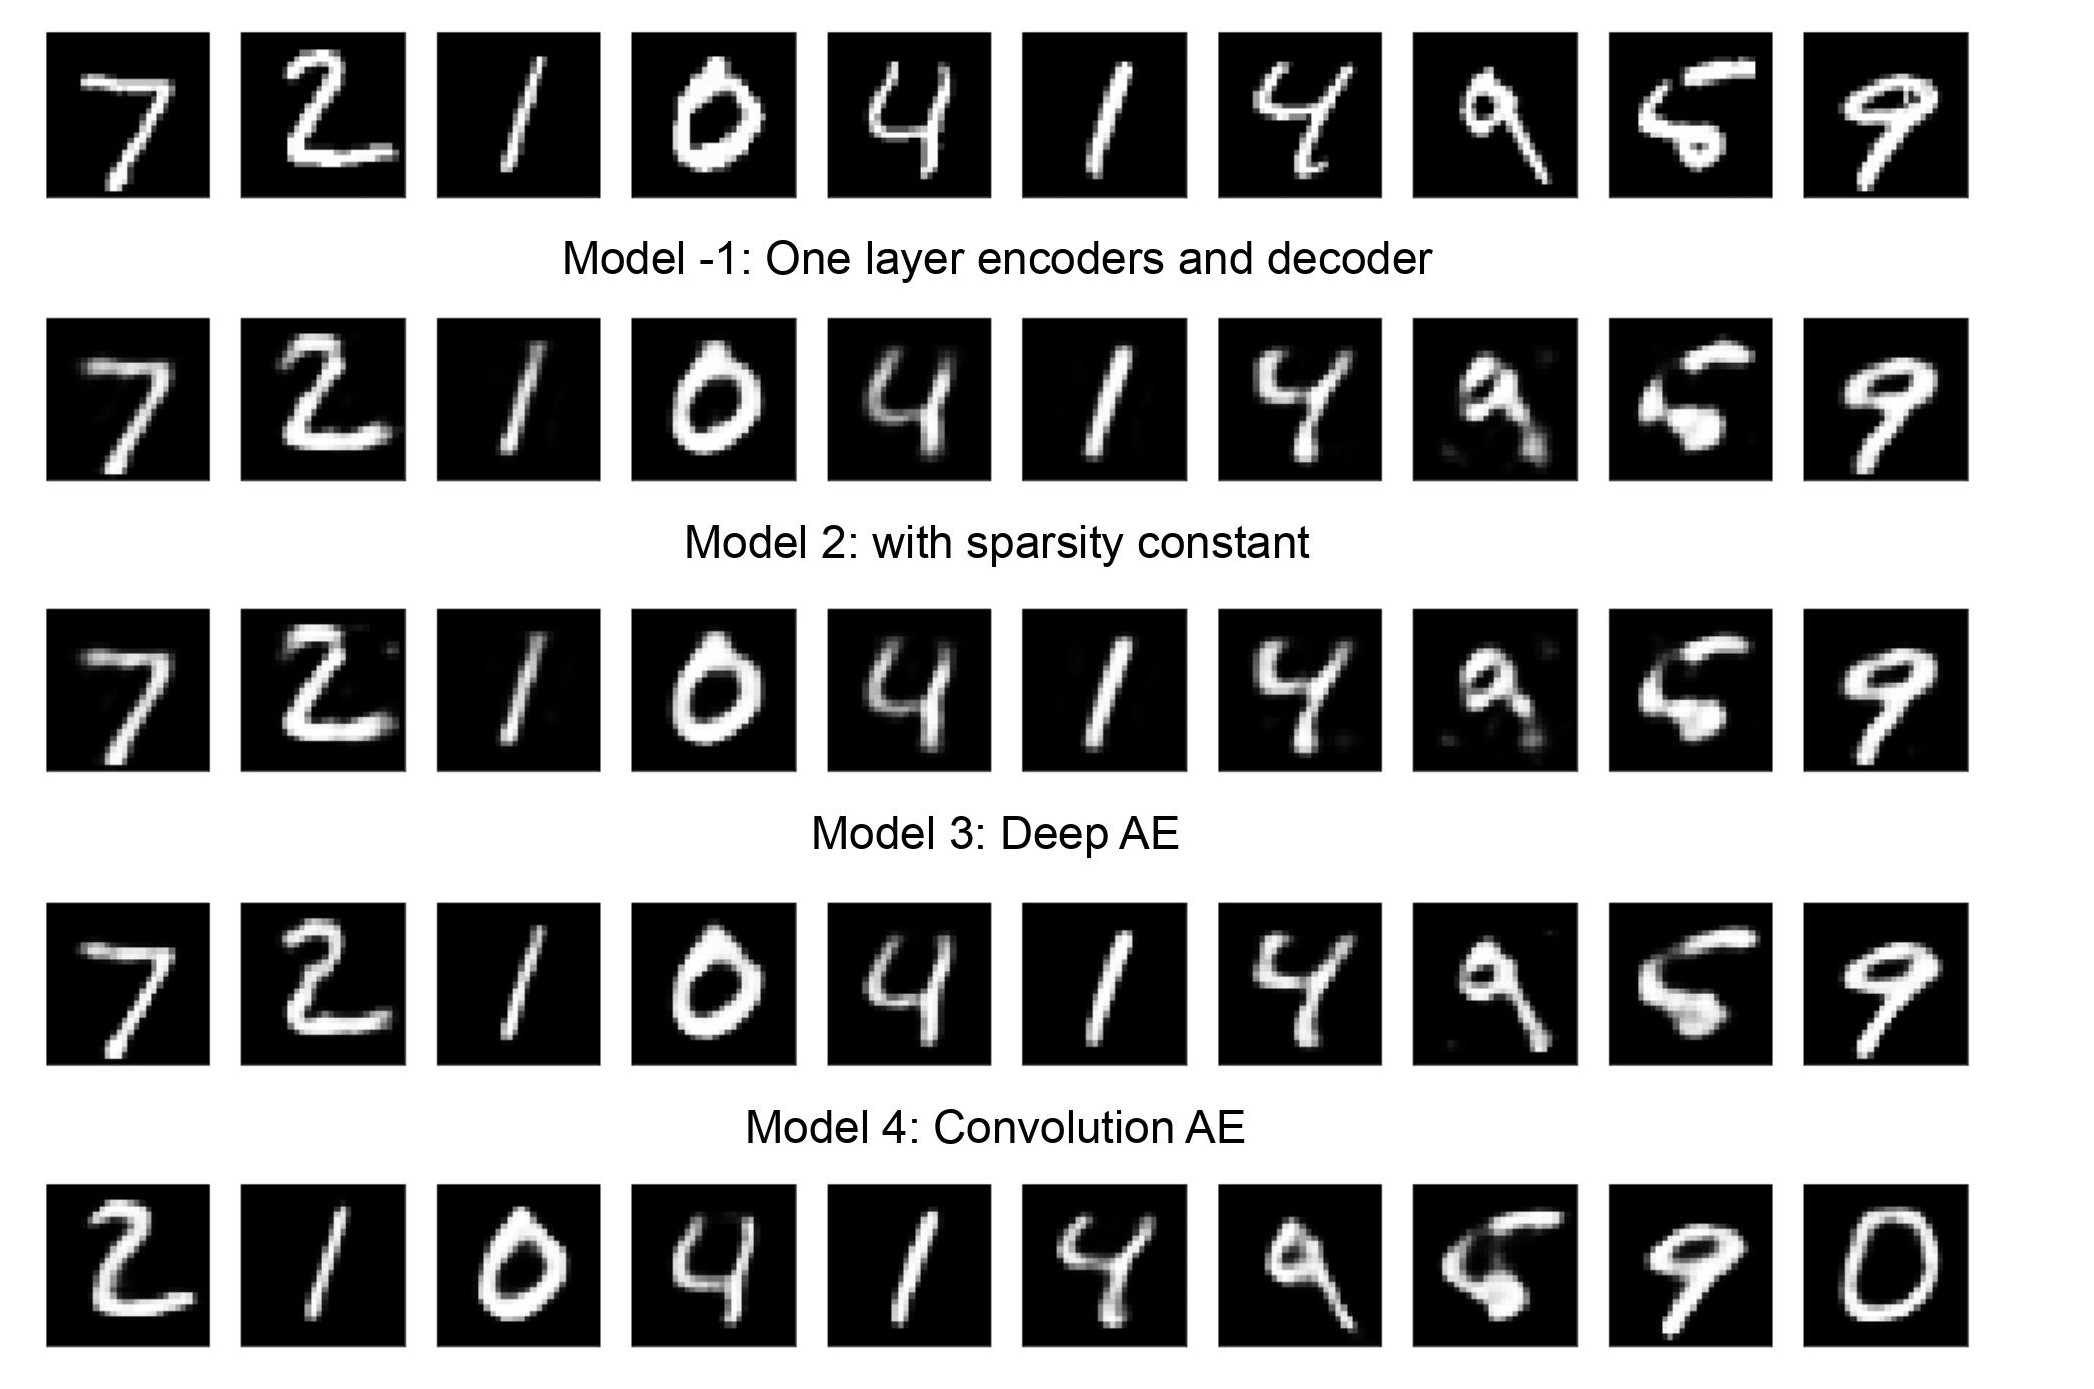

Results


Model | Training Loss | Testing Loss | Comments
--- | ---  | --- | ---
Single Layer AE | 0.0927 | 0.0916 | We are losing quite a bit of detail with this basic approach.Representations were only constrained by the size of the hidden layer (32).
 |   |  | So, hidden layer is learning an approximation of PCA (principal component analysis).
Sparsity constant | 0.096 | 0.095 | The decoded images are pretty similar to the previous model, the only significant difference being the sparsity of the encoded representations. 
| | | encoded_imgs.mean() yields a value 1.26 (over our 10,000 test images), whereas with the previous model the same quantity was 8.5. So our new model yields encoded representations that are more sparser.
Deep AE | 0.08 | 0.08 | The reconstructed images as well as loss are better than previous models.
CNN AE | 0.08 | 0.08 | The loss has converged significantly largely due to the higher entropic capacity of the encoded representation, 128 (8x4x4) dimensions vs. 32 previously. As seen, the reconstructed images are best in this case.



No significant improvement seen with using dropouts.

## Part 2 : Demonstrating results with Noisy Images

Model trained on clean images and tested on noisy images

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_test = x_test.astype('float32') / 255.
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


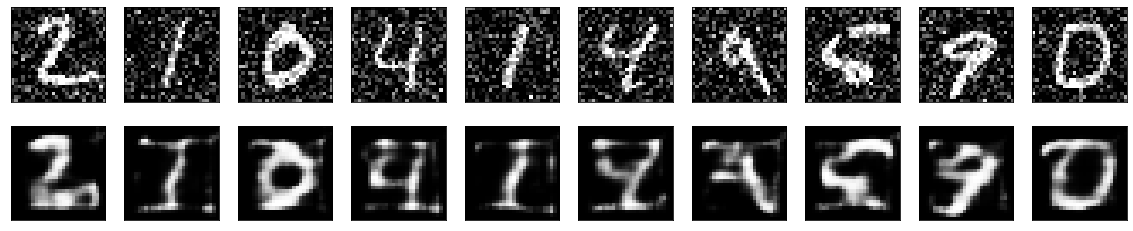

In [ ]:
noise_factor = 0.3

x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Training the AE with both clean and noisy image and give clean image as labelled output

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])


Epoch 1/100
469/469 [==============================] - 8s 15ms/step - loss: 0.1695 - val_loss: 0.1180
Epoch 2/100
469/469 [==============================] - 6s 14ms/step - loss: 0.1138 - val_loss: 0.1093
Epoch 3/100
469/469 [==============================] - 6s 14ms/step - loss: 0.1078 - val_loss: 0.1050
Epoch 4/100
469/469 [==============================] - 6s 14ms/step - loss: 0.1049 - val_loss: 0.1028
Epoch 5/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1029 - val_loss: 0.1017
Epoch 6/100
469/469 [==============================] - 6s 14ms/step - loss: 0.1017 - val_loss: 0.1004
Epoch 7/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1006 - val_loss: 0.0994
Epoch 8/100
469/469 [==============================] - 6s 14ms/step - loss: 0.0999 - val_loss: 0.0990
Epoch 9/100
469/469 [==============================] - 7s 14ms/step - loss: 0.0992 - val_loss: 0.0985
Epoch 10/100
469/469 [==============================] - 6s 14ms/step - loss: 0.098

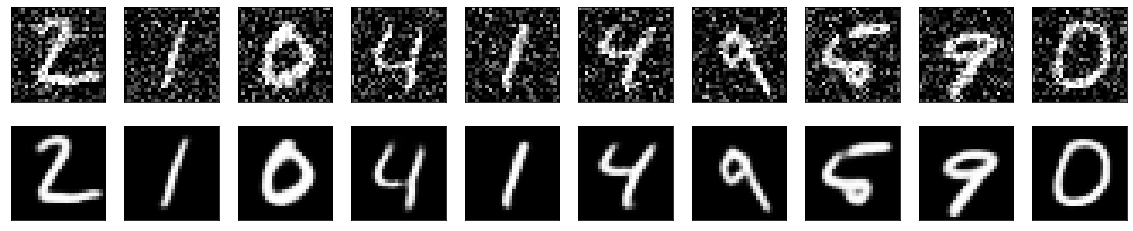

In [ ]:
noise_factor = 0.3 #diff output than it is trained

x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Significant improvement is seen 

#Problem 2 : Demonstrate the importance of different regularization techniques to train an Autoencoder. (pytorch/keras/tensorflow)

Observation to be demonstrated
1. Use suitable data and auto-encoder architecture to demonstrate the same. (MNIST
fashion/digit data can be used)
1. Implement weight decaying, sparse and contractive regularization functions and train the autoencoder using the same and show the significance of using
them in autoencoder training

Regularized autoencoders also try to learn latent variables, but they do so in a different way. Rather than limiting the number of latent variables, regularized autoencoders add some sort of penalty or noise to the loss function. 

## 1. Sparse AE

Adding a sparsity constant


When sparsity constraints added to a hidden unit, it only activates some units (having large activation values) and makes rest to zero. So, even if we are having a large number of hidden units, it will only fire some hidden units and learn useful structure present in the data.

The simplest implementation of sparsity constraints can be done in keras. You can simple add activity_regularizer to a layer and it will do the rest.



In a sparse autoencoder, we restrict the activations of the middle layer to be sparse by adding an L1 Penalty to the activations of the middle layer. So, this means - that a lot of the activations of the middle layer will be zero - and the autoencoder will be forced to assign non-zero values only to the most important attributes of the data.


The idea for this is to create a compact representation of the input.


The sparsity means that the weights of the autoencoder are penalized in the cost function. This is done because without the sparsity constraint an autoencoder would have too many degrees of freedom and then would be very very prone to overfitting. So this is just regularization to try to mantain the complexity of the model at bay preventing overfitting.

In [ ]:
import keras
from keras import layers
from keras import regularizers


#---------------------------Latent Size----------------#
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))

#---------------Encoder--------------------#
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
encoder = keras.Model(input_img, encoded)


#----------------Decoder-------------------#
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)
# Retrieve the last layer of the autoencoder model
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
decoder_layer = autoencoder.layers[-1]


#-----------------Give Input-----------#
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.2849 - val_loss: 0.2000
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1797 - val_loss: 0.1622
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1529 - val_loss: 0.1430
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1384 - val_loss: 0.1319
Epoch 5/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1291 - val_loss: 0.1241
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1225 - val_loss: 0.1186
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1176 - val_loss: 0.1143
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1139 - val_loss: 0.1113
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1112 - val_loss: 0.1088
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1092 - val

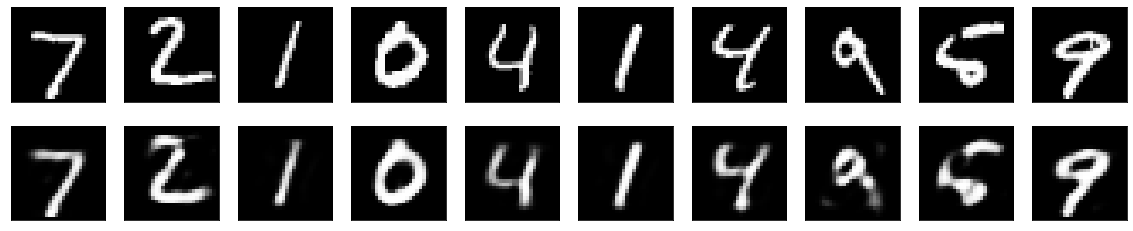

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)


# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
autoencoder.save('/content/drive/MyDrive/autoencoder_2')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/autoencoder_2/assets


sparsity of the encoded representations

In [ ]:
encoded_imgs.mean()

1.2649691

In [ ]:
from sklearn.manifold import TSNE

# Select 1000 samples from data
X_test_sampled = x_test[:1000, :]
y_test_sampled = y_test[:1000]

# Visualizing the Latent representation
x_compressed = encoder.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(x_compressed)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


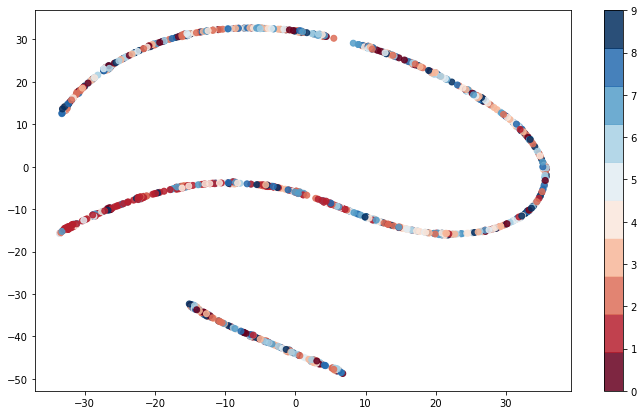

In [ ]:
# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))

## CAE: with sparse constant

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.ActivityRegularization(l1=10e-5)(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50, #More 50 epochs
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
469/469 [==============================] - 7s 13ms/step - loss: 0.2241 - val_loss: 0.1507
Epoch 2/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1404 - val_loss: 0.1314
Epoch 3/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1280 - val_loss: 0.1229
Epoch 4/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1212 - val_loss: 0.1181
Epoch 5/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1169 - val_loss: 0.1141
Epoch 6/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1138 - val_loss: 0.1112
Epoch 7/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1115 - val_loss: 0.1094
Epoch 8/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1096 - val_loss: 0.1075
Epoch 9/50
469/469 [==============================] - 5s 12ms/step - loss: 0.1079 - val_loss: 0.1059
Epoch 10/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1065 - val_lo

In [ ]:
autoencoder.save('/content/drive/MyDrive/autoencoder_cnn_sparse')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/autoencoder_cnn_sparse/assets


In [ ]:
encoder = keras.Model(input_img, encoded)

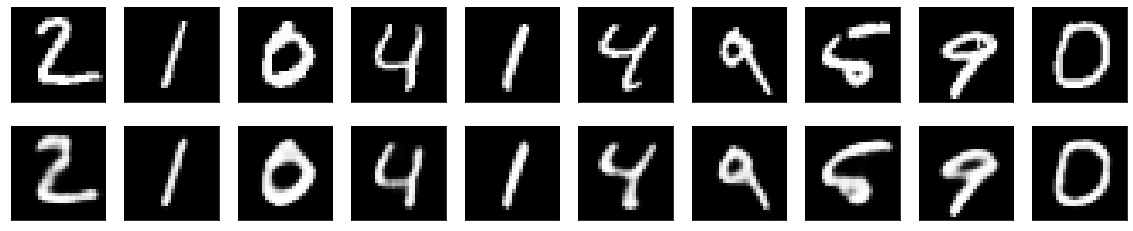

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
from sklearn.manifold import TSNE

# Select 1000 samples from data
X_test_sampled = x_test[:1000, :]
y_test_sampled = y_test[:1000]

# Visualizing the Latent representation
x_compressed = encoder.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(x_compressed)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


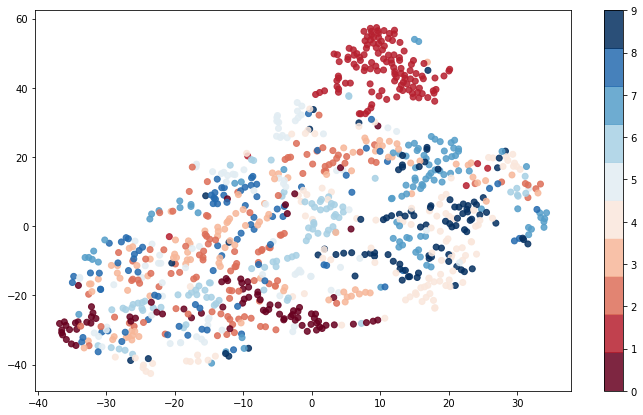

In [ ]:
# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded_1 = layers.ActivityRegularization(l1=10e-5)(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_1)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded_1 = layers.Conv2D(1, (3, 3), activation='linear', padding='same')(x)

autoencoder_1 = keras.Model(input_img, decoded_1)
autoencoder_1.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [ ]:
from keras.callbacks import TensorBoard

autoencoder_1.fit(x_train, x_train,
                epochs=50, #More 50 epochs
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
469/469 [==============================] - 11s 20ms/step - loss: 0.2436 - val_loss: 0.1937
Epoch 2/50
469/469 [==============================] - 8s 16ms/step - loss: 0.2498 - val_loss: 0.2669
Epoch 3/50
469/469 [==============================] - 8s 18ms/step - loss: 0.2240 - val_loss: 0.2055
Epoch 4/50
469/469 [==============================] - 9s 19ms/step - loss: 0.1969 - val_loss: 0.1901
Epoch 5/50
469/469 [==============================] - 9s 19ms/step - loss: 0.2226 - val_loss: 0.1959
Epoch 6/50
469/469 [==============================] - 9s 18ms/step - loss: 0.1981 - val_loss: 0.2035
Epoch 7/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1877 - val_loss: 0.1796
Epoch 8/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1833 - val_loss: 0.1773
Epoch 9/50
469/469 [==============================] - 6s 12ms/step - loss: 0.2097 - val_loss: 0.1852
Epoch 10/50
469/469 [==============================] - 6s 12ms/step - loss: 0.1897 - val_l

In [ ]:
encoder_1 = keras.Model(input_img, encoded_1)

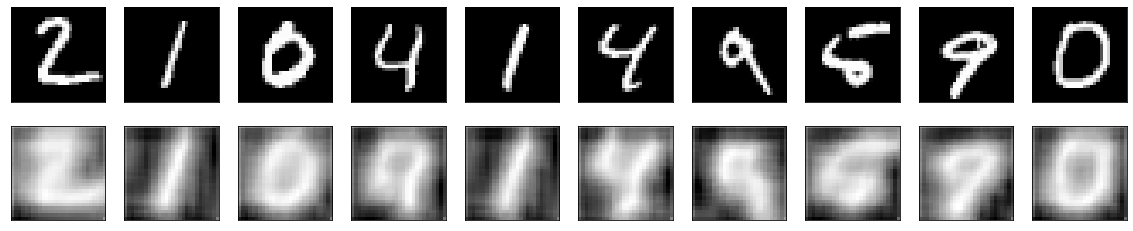

In [ ]:
decoded_imgs = autoencoder_1.predict(x_test)
encoded_imgs = encoder_1.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
from sklearn.manifold import TSNE

# Select 1000 samples from data
X_test_sampled = x_test[:1000, :]
y_test_sampled = y_test[:1000]

# Visualizing the Latent representation
x_compressed = encoder_1.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(x_compressed)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


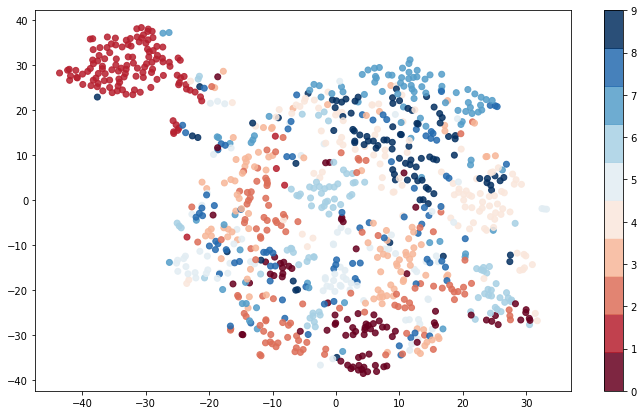

In [ ]:
# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))

In [ ]:
x_compressed = encoder_1.predict(X_test_sampled)

In [ ]:
x_compressed[0]

array([[[5.59235588e-02, 1.60875246e-01, 2.26478606e-01, 1.32408231e-01,
         3.97640616e-02, 7.93725252e-02, 2.00541452e-01, 0.00000000e+00],
        [0.00000000e+00, 2.33839259e-01, 1.71088398e-01, 2.38668263e-01,
         3.17024067e-02, 0.00000000e+00, 2.21408501e-01, 0.00000000e+00],
        [0.00000000e+00, 1.48227647e-01, 5.77765778e-02, 2.00443193e-01,
         1.98350474e-02, 0.00000000e+00, 2.29761183e-01, 0.00000000e+00],
        [3.61592993e-02, 0.00000000e+00, 0.00000000e+00, 1.38316169e-01,
         0.00000000e+00, 0.00000000e+00, 5.86098805e-02, 0.00000000e+00]],

       [[3.01571012e-01, 2.69305617e-01, 3.14388946e-02, 1.11286759e-01,
         1.81128889e-01, 4.74106744e-02, 8.58308077e-02, 0.00000000e+00],
        [2.53514707e-01, 3.78527433e-01, 2.05449551e-01, 1.09846339e-01,
         3.43667984e-01, 0.00000000e+00, 2.25639224e-01, 0.00000000e+00],
        [1.61876351e-01, 4.39601481e-01, 1.61771193e-01, 1.10528097e-02,
         3.12469244e-01, 0.00000000e+00, 1.

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded_2 = layers.ActivityRegularization(l1=10e-5)(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_2)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded_2 = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)

autoencoder_2 = keras.Model(input_img, decoded_2)
autoencoder_2.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [ ]:
from keras.callbacks import TensorBoard

autoencoder_2.fit(x_train, x_train,
                epochs=50, #More 50 epochs
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
469/469 [==============================] - 14s 26ms/step - loss: 0.2508 - val_loss: 0.2765
Epoch 2/50
469/469 [==============================] - 9s 19ms/step - loss: 0.2247 - val_loss: 0.2186
Epoch 3/50
469/469 [==============================] - 8s 17ms/step - loss: 0.1970 - val_loss: 0.1853
Epoch 4/50
469/469 [==============================] - 8s 17ms/step - loss: 0.1840 - val_loss: 0.1804
Epoch 5/50
469/469 [==============================] - 8s 18ms/step - loss: 0.2180 - val_loss: 0.3115
Epoch 6/50
469/469 [==============================] - 8s 17ms/step - loss: 0.2272 - val_loss: 0.2086
Epoch 7/50
469/469 [==============================] - 8s 17ms/step - loss: 0.1928 - val_loss: 0.1829
Epoch 8/50
469/469 [==============================] - 6s 14ms/step - loss: 0.1824 - val_loss: 0.1807
Epoch 9/50
469/469 [==============================] - 6s 13ms/step - loss: 0.2404 - val_loss: 0.2163
Epoch 10/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1990 - val_l

In [ ]:
encoder_2 = keras.Model(input_img, encoded_2)

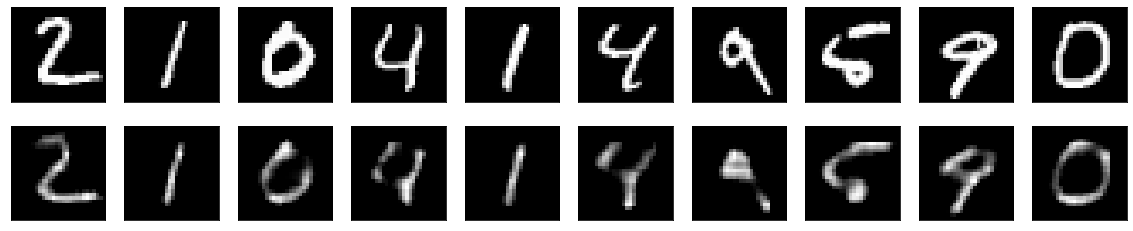

In [ ]:
decoded_imgs = autoencoder_2.predict(x_test)
encoded_imgs = encoder_2.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
from sklearn.manifold import TSNE

# Select 1000 samples from data
X_test_sampled = x_test[:1000, :]
y_test_sampled = y_test[:1000]

# Visualizing the Latent representation
x_compressed = encoder_2.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(x_compressed)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


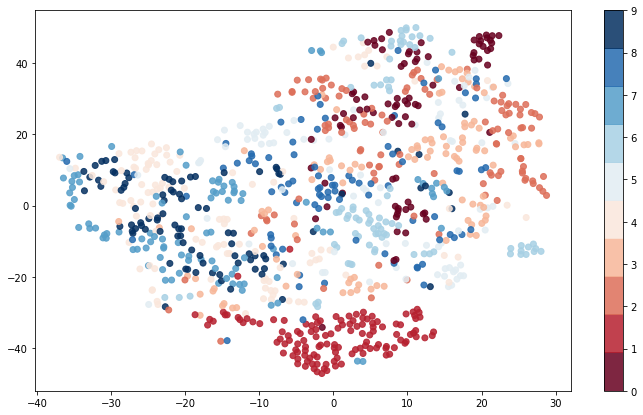

In [ ]:
# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))

## Contractive AE

We wish to extract features that only reflect variations observed in the training set

Denoising Autoencoders (DAE) works by inducing some noise in the input vector and then transforming it into the hidden layer, while trying to reconstruct the original vector. 


Contractive autoencoders work on the basis that similar inputs should have similar encodings and a similar latent space representation. It means that the latent space should not vary by a huge amount for minor variations in the input.

It makes encoding less sensitive to small variations in its training dataset. This is accomplished by adding a regularizer, or penalty term, to whatever cost or objective function the algorithm is trying to minimize. The end result is to reduce the learned representation’s sensitivity towards the training input. 

From the mathematical point of view, it gives the effect of contraction by adding an additional term to reconstruction cost. This addition is the Sqrt Frobenius norm of Jacobian of the hidden layer representation with respect to input values. If this value is zero, it means, as we change input values, we don’t observe any change on the learned hidden representations. If we get very large values then the learned representation is unstable as the input values change.

**Mathematics**

The Jacobian matrix of a vector-valued function of several variables matrix all its first-order partial derivatives in vector calculus. 

The Jacobian matrix of a vector-valued function of several variables matrix all its first-order partial derivatives in vector calculus. 



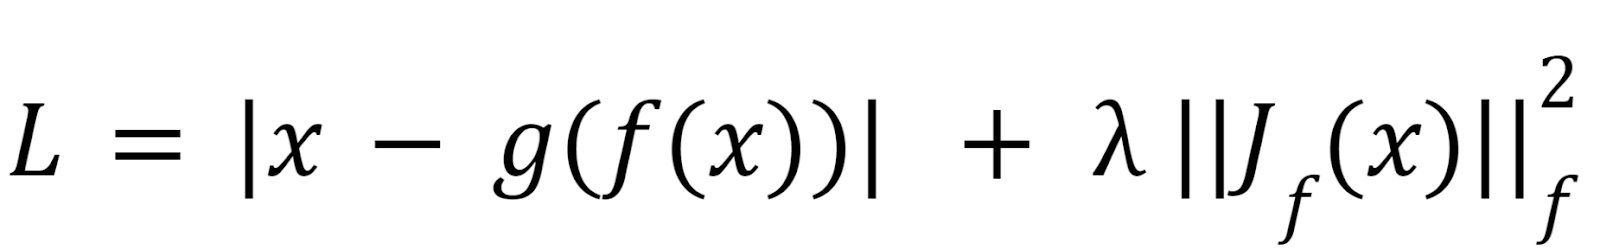

Added penality term : 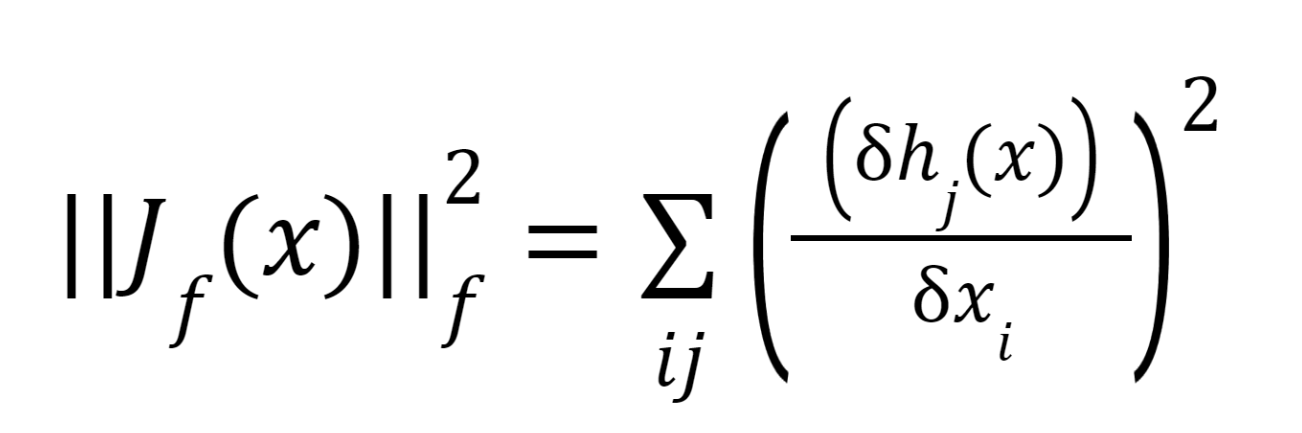

The penalty term, λ x ||(J(x))||^2, is the squared Frobenius norm of the Jacobian matrix of partial derivatives.

In the above penalty term, we first need to calculate the Jacobian matrix of the hidden layer. Calculating a jacobian of the hidden layer concerning input is similar to gradient calculation. Let's first figure out the Jacobian of hidden layer:

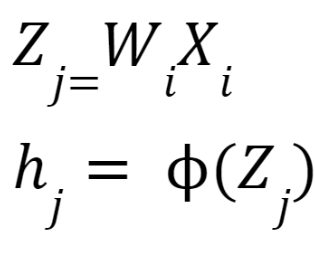

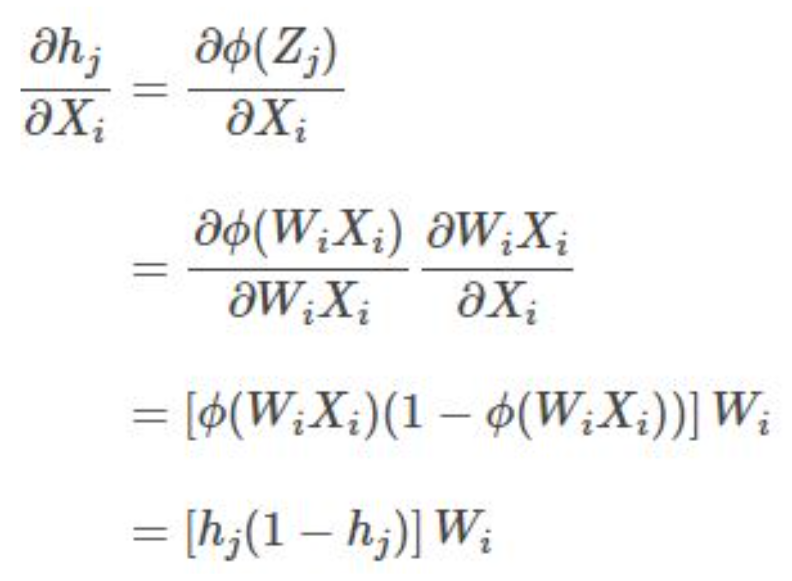

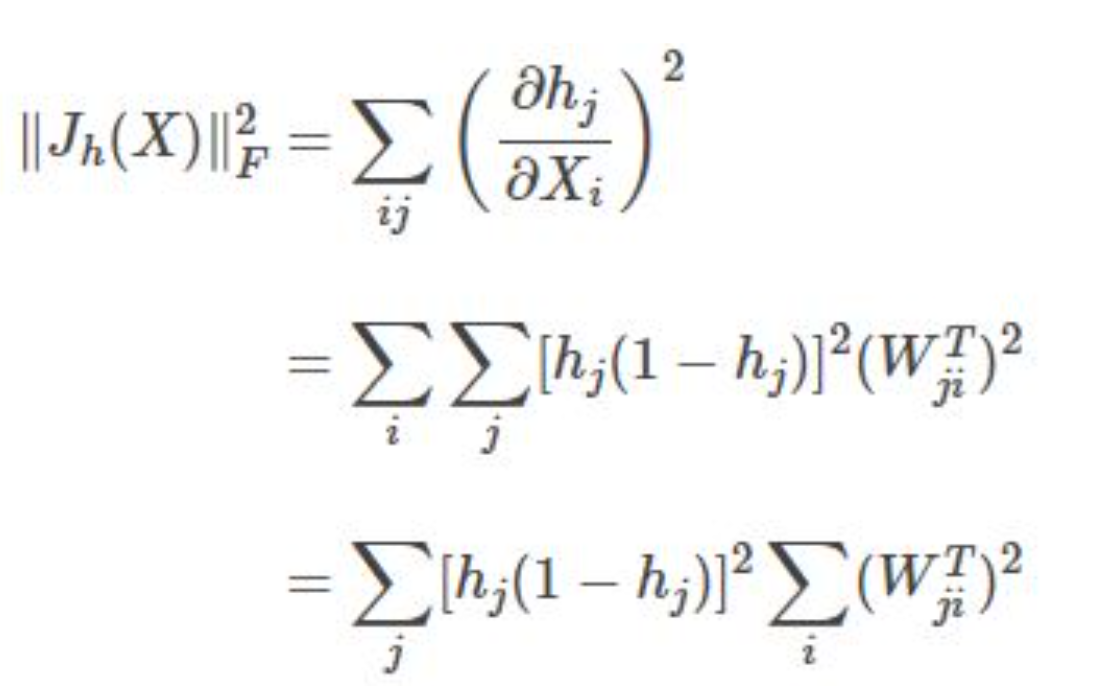

In [ ]:
#Load the mnist digit Data
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) #28x28 = 784 : Flatten the images
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


print("Train : ", x_train.shape)
print("Test : ", x_test.shape)


Train :  (60000, 784)
Test :  (10000, 784)


In [ ]:
import tensorflow as tf
  
class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.flatten_layer  =tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)
          
          
        self.bottleneck = tf.keras.layers.Dense(32, activation=tf.nn.relu)
      
        self.dense2 = tf.keras.layers.Dense(64, activation=tf.nn.relu)
          
        self.dense_final = tf.keras.layers.Dense(784)
          
      
    def call(self, inp):
        x_reshaped = self.flatten_layer(inp)
        x = self.dense1(x_reshaped)
        x = self.bottleneck(x)
        x_hid= x
        x = self.dense2(x)
        x = self.dense_final(x)
        return x, x_reshaped,x_hid


# define loss function and gradient
lmbda = 100

def loss(x, x_bar, h, model):
    reconstruction_loss = tf.reduce_mean( 
                tf.keras.losses.mse(x, x_bar) 
            ) 
    reconstruction_loss *= 28 * 28
    W= tf.Variable(model.bottleneck.weights[0])
    dh = h * (1 - h)  # N_batch x N_hidden
    W = tf.transpose(W)
    contractive = lmbda * tf.reduce_sum(tf.linalg.matmul(dh**2 ,tf.square(W)), axis=1)
    total_loss = reconstruction_loss + contractive
    return total_loss

def grad(model, inputs):
    with tf.GradientTape() as tape:
        reconstruction, inputs_reshaped,hidden = model(inputs)
        loss_value = loss(inputs_reshaped, reconstruction, hidden, model)
    return loss_value, tape.gradient(loss_value, model.trainable_variables), inputs_reshaped, reconstruction
   

# load dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# train the model
model = AutoEncoder()
optimizer = tf.optimizers.Adam(learning_rate=0.001)
global_step = tf.Variable(0)
num_epochs = 200
batch_size = 128
for epoch in range(num_epochs):
    print("Epoch: ", epoch)
    for x in range(0, len(x_train), batch_size):
        x_inp = x_train[x : x + batch_size]
        loss_value, grads, inputs_reshaped, reconstruction = grad(model, x_inp)
        optimizer.apply_gradients(zip(grads, model.trainable_variables),
                              global_step)
          
    print("Step: {}, Loss: {}".format(global_step.numpy(),tf.reduce_sum(loss_value)))
  

Epoch:  0
Step: 0, Loss: 4787.759765625
Epoch:  1
Step: 0, Loss: 4788.9404296875
Epoch:  2
Step: 0, Loss: 4680.203125
Epoch:  3
Step: 0, Loss: 4467.75048828125
Epoch:  4
Step: 0, Loss: 4264.4453125
Epoch:  5
Step: 0, Loss: 4043.56884765625
Epoch:  6
Step: 0, Loss: 3871.07958984375
Epoch:  7
Step: 0, Loss: 3774.364013671875
Epoch:  8
Step: 0, Loss: 3696.8447265625
Epoch:  9
Step: 0, Loss: 3508.4306640625
Epoch:  10
Step: 0, Loss: 3350.94970703125
Epoch:  11
Step: 0, Loss: 3245.5439453125
Epoch:  12
Step: 0, Loss: 3202.810302734375
Epoch:  13
Step: 0, Loss: 3140.88916015625
Epoch:  14
Step: 0, Loss: 3101.994140625
Epoch:  15
Step: 0, Loss: 3072.32861328125
Epoch:  16
Step: 0, Loss: 2949.59619140625
Epoch:  17
Step: 0, Loss: 2865.82421875
Epoch:  18
Step: 0, Loss: 2794.6357421875
Epoch:  19
Step: 0, Loss: 2745.0390625
Epoch:  20
Step: 0, Loss: 2683.9970703125
Epoch:  21
Step: 0, Loss: 2625.0361328125
Epoch:  22
Step: 0, Loss: 2585.20751953125
Epoch:  23
Step: 0, Loss: 2554.728759765625
Ep

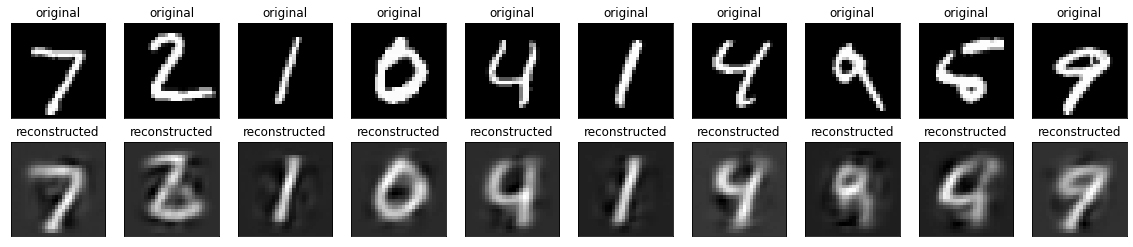

In [ ]:
n = 10
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  reconstruction, inputs_reshaped,hidden = model(x_test[i].reshape((1,784)))
  plt.imshow(reconstruction.numpy().reshape((28,28)))
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from sklearn.manifold import TSNE

# Select 1000 samples from data
X_test_sampled = x_test[:1000, :]
y_test_sampled = y_test[:1000]

# Visualizing the Latent representation
reconstruction, inputs_reshaped,hidden = model(X_test_sampled)
# x_compressed = encoder.predict(X_test_sampled).mean(axis = -1).reshape(1000, -1)

# Use TSNE
tsne = TSNE(n_jobs=-1)
X_compressed_2d  =  tsne.fit_transform(hidden)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


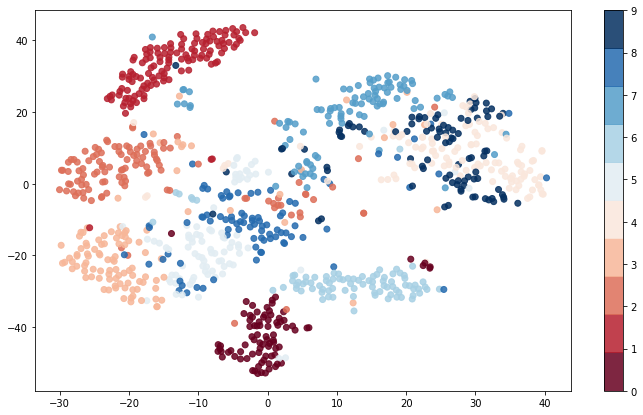

In [ ]:
# Plot in scatterplot and color by digit name
plt.figure(figsize = (12, 7))
cmap = plt.get_cmap('RdBu', 10)
sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test_sampled, alpha = .85, cmap = cmap)
cax = plt.colorbar(sc, ticks=np.arange(0,10))

In [ ]:
#Load the mnist digit Data
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) #28x28 = 784 : Flatten the images
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


print("Train : ", x_train.shape)
print("Test : ", x_test.shape)


11501568/11490434 [==============================] - 0s 0us/step
Train :  (60000, 784)
Test :  (10000, 784)


In [ ]:
import tensorflow as tf
  
class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.flatten_layer  =tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)
          
          
        self.bottleneck = tf.keras.layers.Dense(32, activation=tf.nn.relu)
      
        self.dense2 = tf.keras.layers.Dense(64, activation=tf.nn.relu)
          
        self.dense_final = tf.keras.layers.Dense(784, activation=tf.nn.sigmoid)
          
      
    def call(self, inp):
        x_reshaped = self.flatten_layer(inp)
        x = self.dense1(x_reshaped)
        x = self.bottleneck(x)
        x_hid= x
        x = self.dense2(x)
        x = self.dense_final(x)
        return x, x_reshaped,x_hid


# define loss function and gradient
lmbda = 100

def loss(x, x_bar, h, model):
    reconstruction_loss = tf.reduce_mean( 
                tf.keras.losses.mse(x, x_bar) 
            ) 
    reconstruction_loss *= 28 * 28
    W= tf.Variable(model.bottleneck.weights[0])
    dh = h * (1 - h)  # N_batch x N_hidden
    W = tf.transpose(W)
    contractive = lmbda * tf.reduce_sum(tf.linalg.matmul(dh**2 ,tf.square(W)), axis=1)
    total_loss = reconstruction_loss + contractive
    return total_loss

def grad(model, inputs):
    with tf.GradientTape() as tape:
        reconstruction, inputs_reshaped,hidden = model(inputs)
        loss_value = loss(inputs_reshaped, reconstruction, hidden, model)
    return loss_value, tape.gradient(loss_value, model.trainable_variables), inputs_reshaped, reconstruction
   

# load dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# train the model
model = AutoEncoder()
optimizer = tf.optimizers.Adam(learning_rate=0.001)
global_step = tf.Variable(0)
num_epochs = 400
batch_size = 128
for epoch in range(num_epochs):
    print("Epoch: ", epoch)
    for x in range(0, len(x_train), batch_size):
        x_inp = x_train[x : x + batch_size]
        loss_value, grads, inputs_reshaped, reconstruction = grad(model, x_inp)
        optimizer.apply_gradients(zip(grads, model.trainable_variables),
                              global_step)
          
    print("Step: {}, Loss: {}".format(global_step.numpy(),tf.reduce_sum(loss_value)))
  

Epoch:  0
Step: 0, Loss: 4907.2822265625
Epoch:  1
Step: 0, Loss: 4848.435546875
Epoch:  2
Step: 0, Loss: 4834.68359375
Epoch:  3
Step: 0, Loss: 4830.31640625
Epoch:  4
Step: 0, Loss: 4817.58935546875
Epoch:  5
Step: 0, Loss: 4817.5576171875
Epoch:  6
Step: 0, Loss: 4816.9072265625
Epoch:  7
Step: 0, Loss: 4808.87451171875
Epoch:  8
Step: 0, Loss: 4704.8447265625
Epoch:  9
Step: 0, Loss: 4642.6953125
Epoch:  10
Step: 0, Loss: 4629.03515625
Epoch:  11
Step: 0, Loss: 4611.9482421875
Epoch:  12
Step: 0, Loss: 4606.3095703125
Epoch:  13
Step: 0, Loss: 4602.919921875
Epoch:  14
Step: 0, Loss: 4647.0576171875
Epoch:  15
Step: 0, Loss: 4614.41064453125
Epoch:  16
Step: 0, Loss: 4648.12109375
Epoch:  17
Step: 0, Loss: 4608.73876953125
Epoch:  18
Step: 0, Loss: 4546.78173828125
Epoch:  19
Step: 0, Loss: 4636.68994140625
Epoch:  20
Step: 0, Loss: 4574.10791015625
Epoch:  21
Step: 0, Loss: 4615.6787109375
Epoch:  22
Step: 0, Loss: 4532.498046875
Epoch:  23
Step: 0, Loss: 4656.00830078125
Epoch:  

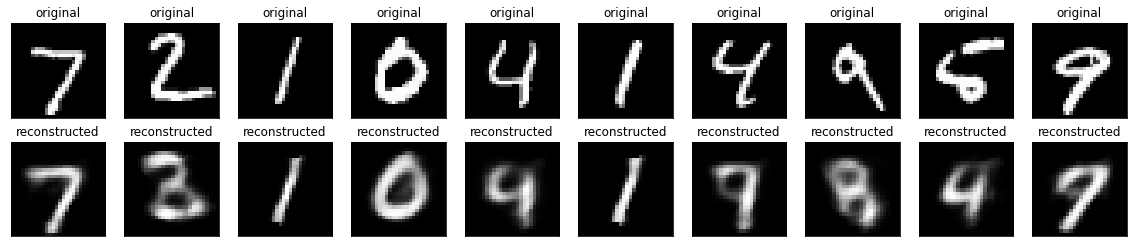

In [ ]:
n = 10
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  reconstruction, inputs_reshaped,hidden = model(x_test[i].reshape((1,784)))
  plt.imshow(reconstruction.numpy().reshape((28,28)))
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

##Inferences - problem 2

**Sparse AE**

Training loss: 0.0969 - val_loss: 0.0958


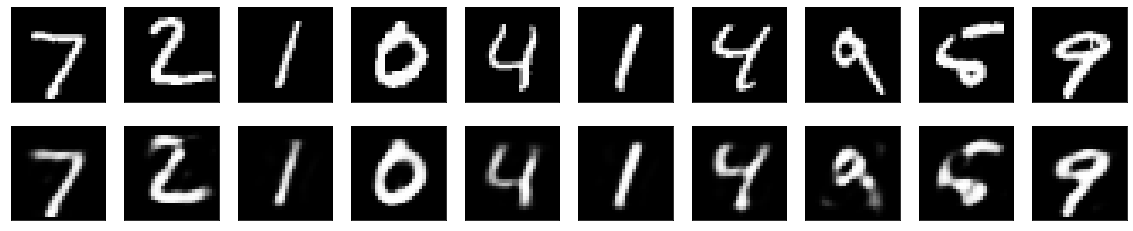




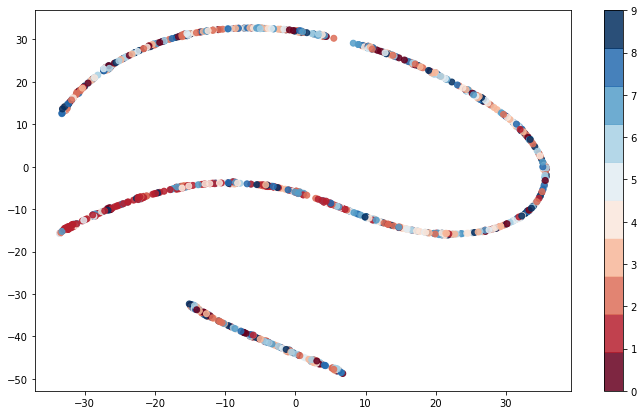

**Convolutional AE with sparsity constant**

**Model - 1 : Sigmoid activation**

loss: 0.0917 - val_loss: 0.0906

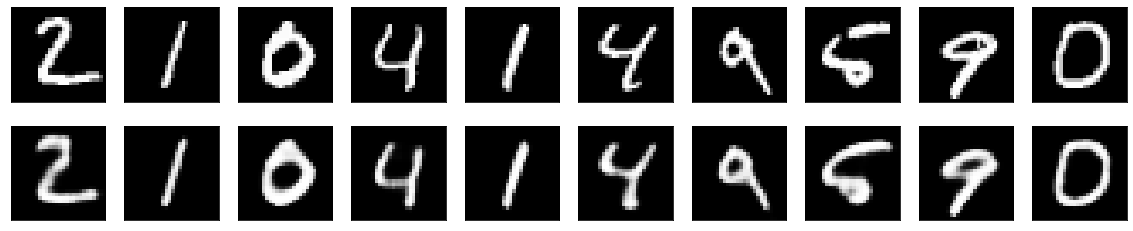

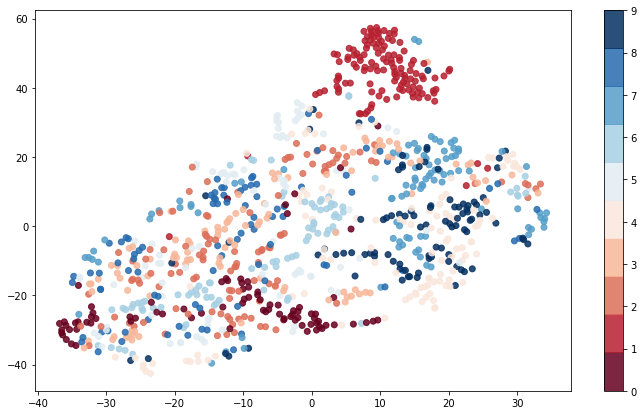

**Model - 2 : Linear activation**

loss: 0.1514 - val_loss: 0.1492

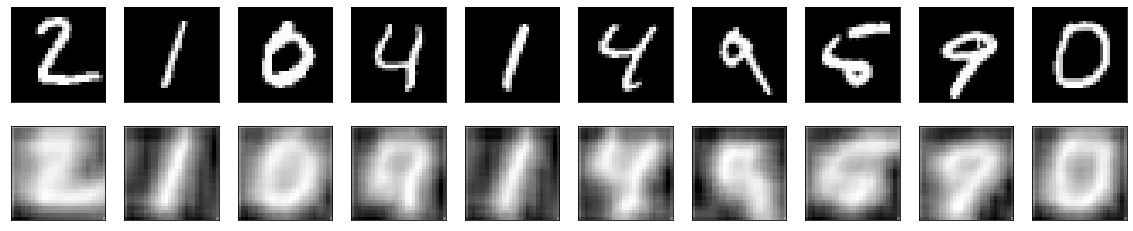

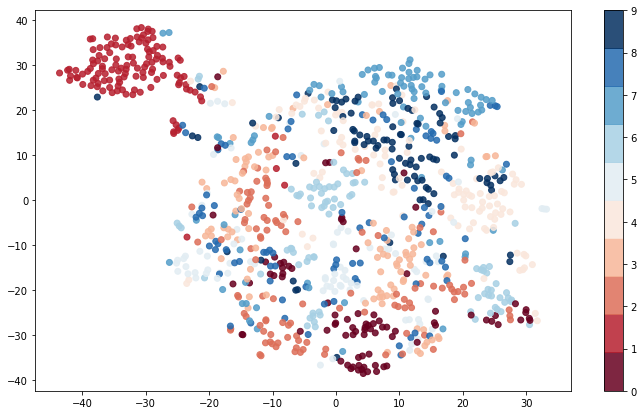

**Model - 3 Relu avtivation**

loss: 0.1408 - val_loss: 0.1335


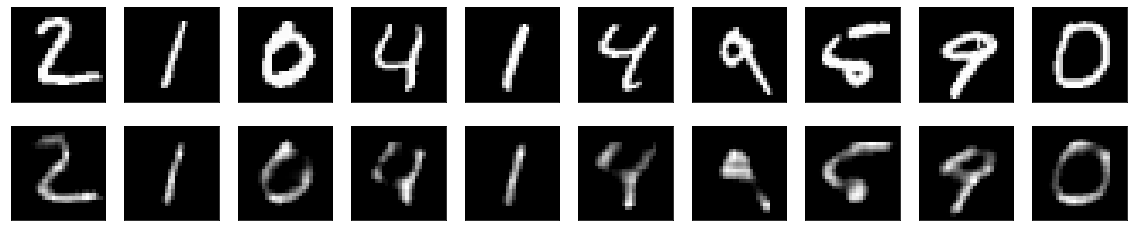

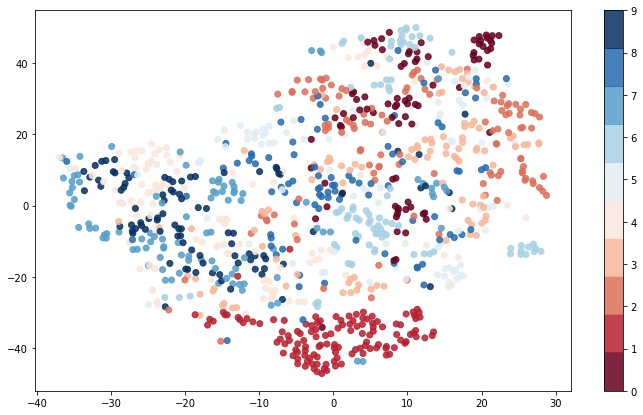

**Contractive AE**

